<a href="https://colab.research.google.com/github/vaneesa-writes/GSOC-2022-prep/blob/main/mitosis_segment_31may2k22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os, cv2, json
from glob import glob
import matplotlib.pyplot as plt
from skimage.draw import polygon
import imutils

In [5]:
img = cv2.imread('/content/A07_03Da.tiff')
img_name='A07_03Da'

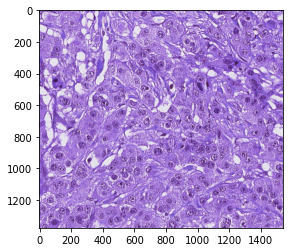

In [3]:
plt.imshow(img)

True

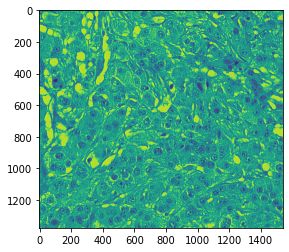

In [8]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
cv2.imwrite(img_name+'_gray.png', img_gray)

In [9]:
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
cv2.imwrite(img_name+'_gaussianblur.png', img_blur)

True

In [10]:
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=1) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=1) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=1) # Combined X and Y Sobel Edge Detection

In [11]:
cv2.imwrite(img_name+'_sobelx.png', sobelx)
cv2.imwrite(img_name+'_sobely.png', sobely)
cv2.imwrite(img_name+'_sobelxy.png', sobelxy)

True

In [12]:
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8))
claheNorm = clahe.apply(img_gray)
cv2.imwrite(img_name+'_claheNorm.png', claheNorm)

True

In [15]:
edged = cv2.Canny(img_gray, 30, 200)
cv2.imwrite(img_name+'_canny1.png', edged)

True

In [16]:
blurM = cv2.medianBlur(img_gray, 5)
cv2.imwrite(img_name+'_blurM1.png', blurM)

# apply gaussian filter for smoothning
blurG = cv2.GaussianBlur(img_gray, (9, 9), 0)
cv2.imwrite(img_name+'_blurG1.png', blurG)

True

In [18]:
edge = cv2.Canny(img_gray, 100, 200)
cv2.imwrite(img_name+'_canny2.png', edge)

edgeG = cv2.Canny(blurG, 100, 200)
cv2.imwrite(img_name+'_canny3.png', edgeG)

edgeM = cv2.Canny(blurM, 100, 200)
cv2.imwrite(img_name+'_canny24.png', edgeM)

True

In [19]:
img=cv2.imread('/content/A07_03Da_claheNorm.png')

In [20]:
img.shape

(1376, 1539, 3)

In [22]:
IMG_WIDTH=img.shape[0]
IMG_HEIGHT=img.shape[1]

In [33]:
new_img=np.zeros([IMG_WIDTH,IMG_HEIGHT,3],dtype=int)
new_img.fill(255)

In [36]:
for i in range(IMG_WIDTH):
  for j in range(IMG_HEIGHT):
    for k in range(3):

      if(img[i][j][k]>=40):
        new_img[i][j][k]=0

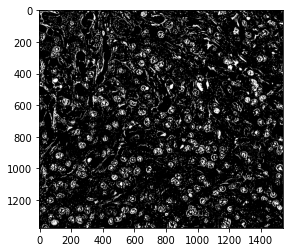

In [37]:


plt.imshow(new_img)
# cv2.imwrite(img_name+'_threshold80.png', new_img)
